
In this kernel, we will try to answer the question that whether or not it will rain tomorrow in Australia. We implement Logistic Regression with Python and Scikit-Learn.

To answer the question, we build a classifier to predict whether or not it will rain tomorrow in Australia. We train a binary classification model using Logistic Regression. I have used the Rain in Australia dataset for this project.

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Explanatory Data Analysis**

we explore our data and gain insights about it

In [4]:
#View the dimension of the dataset
df.shape

(145460, 23)

We can see that we have 145,460 instances and 24 variables

In [5]:
#View column names
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
#View summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**.**The dataset contains mixture of categorical and numeric variables
**.**Categorical variables have datatype object
**.**Categorical variables have datatype float64
**.**There are also missing values,we shall explore later

In [7]:
#View the statistical properties of dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**df.describe**-helps us view the statistical properties of numerical values only.
**df.describe(include=['object'])**-statistical properties of character variables
**df.describe(include=['all'])**-statistical properties of all the variables

**Univariate Analysis**

Explore *RainTomorrow* target variable

In [8]:
df['RainTomorrow'].isnull().sum()

3267

The target variable has 3267 missing values...we shall handle it later

In [9]:
#Viewing number of unique values
df['RainTomorrow'].nunique()

2

In [10]:
#View the unique values
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
#View frequency of distribution of values
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [12]:
#View percentage of frequency of distribution of values
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

We can see that out of the total number of RainTomorrow values, No appears 75.83% times and Yes appears 21.91% times.

**Bivariate analysis**
In this section,we segregate the dataset into categorical and numerical variables

In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [14]:
#Explore the Categorical Variables
categorical=[var for var in df.columns if df[var].dtype == 'O']
#categorical_df=df[categorical]

print('There are {} categorical variables \n'.format(len(categorical)))

print('The categorical variables are:',categorical)

There are 7 categorical variables 

The categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


**Summary of categorical variables**
There is a date variable. It is denoted by Date column.

There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

There are two binary categorical variables - RainToday and RainTomorrow.

RainTomorrow is the target variable.

Lets explore problems within the categorical variables

In [16]:
#CHeck for missing  variables
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

**Number of labels:cardinality**
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [17]:
#Check for cardinality
for var in categorical:
    print(var,'contains',len(df[var].unique()),'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

**Feature engineering of Date variable**

We can see that the data type of Date variable is object. I will parse the date currently coded as object into datetime format.

In [18]:
#parse the dates,currently coded as strings,into datetime format
df['DateT']=pd.to_datetime(df['Date'])

In [19]:
#Extract year from date
df['Year'] = df['DateT'].dt.year

#Extract month from date
df['Month'] = df['DateT'].dt.month

#Extract day from date
df['Day'] = df['DateT'].dt.day

In [20]:
#drop the first Date variable
df.drop('DateT',axis=1,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**.**Explore each caregorical Variable

**Explore the numerical variables**

In [22]:
numerical=[var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are:',numerical)

There are 19 numerical variables

The numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [23]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


**Outliers in numerical variables**

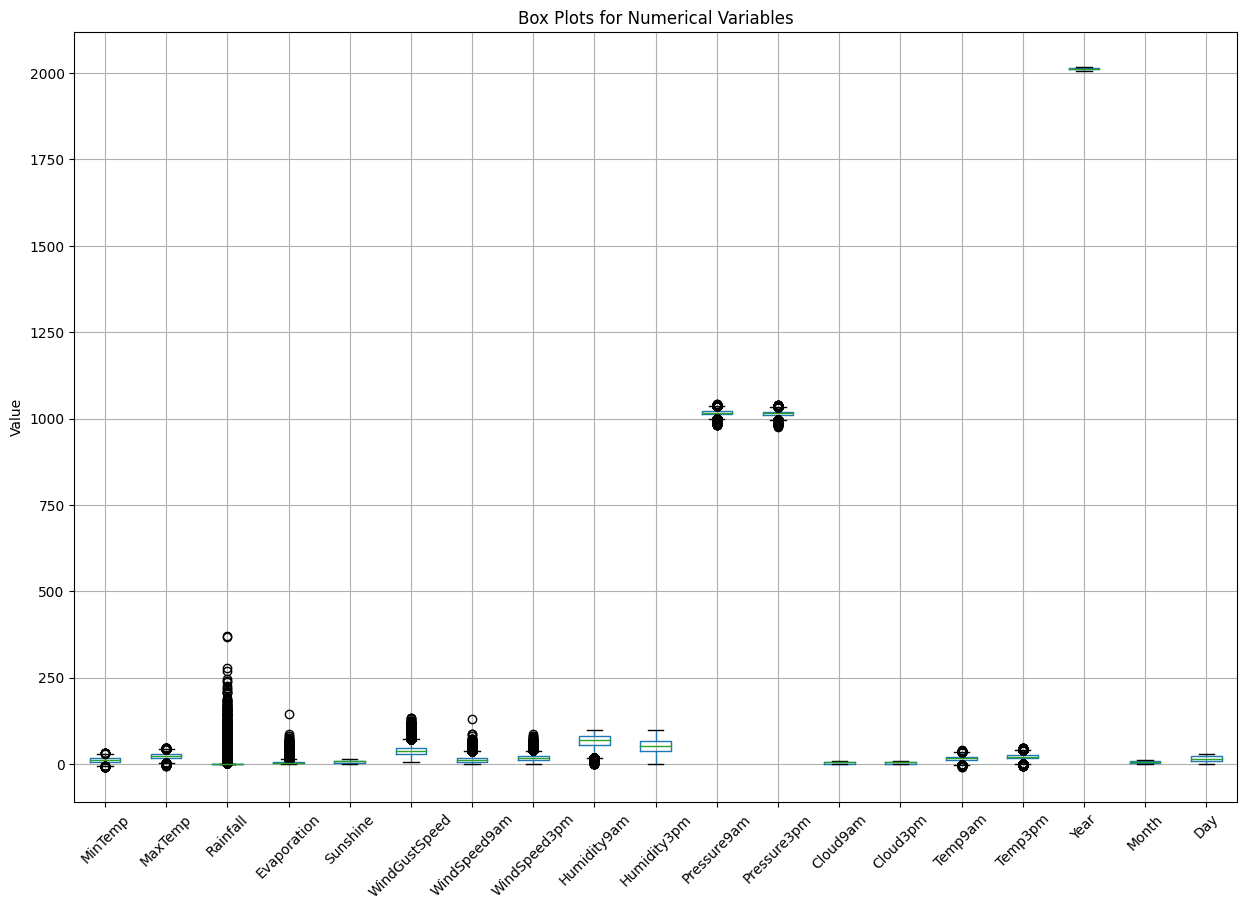

In [24]:
# Create box plots for each numerical variable
plt.figure(figsize=(15, 10))
df[numerical].boxplot()
plt.title("Box Plots for Numerical Variables")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

On closer observation,we can see that the Rainfall,Evaporation,WindGustSpeed,WindSpeed3pm and WindSpeed3pm

**Check for the distribution of variables**


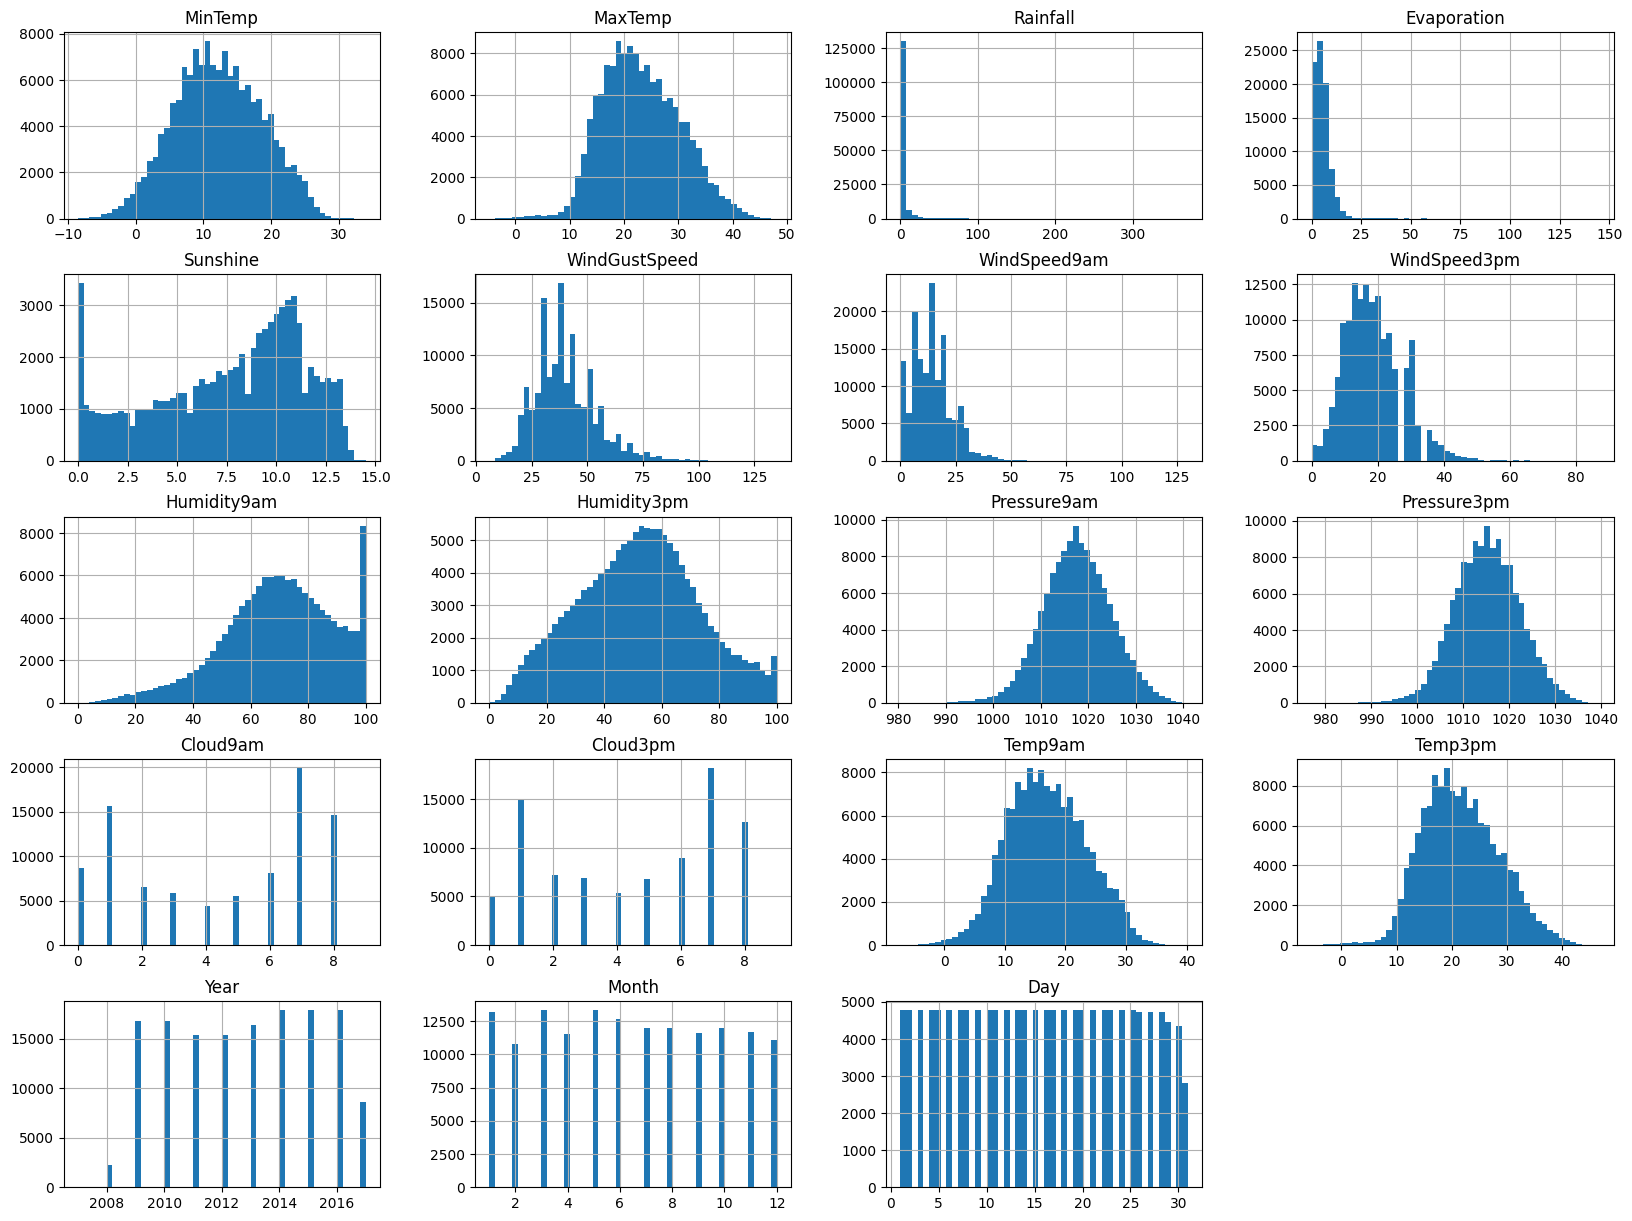

In [25]:
df[numerical].hist(bins=50, figsize=(20,15))
plt.show()


Rainfall,Evaporation,WindGustSpeed,WindSpeed3pm and WindSpeed3pm are skewed.So i will use interquartile range to find outliers.

In [26]:
#Find outliers for the  above variables
#Outliers for Rainfall Variable
IQR=df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence=df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence=df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {Lowerboundary} or > {Upperboundary}'.format(Lowerboundary=Lower_fence,
                                                                                   Upperboundary=Upper_fence))



Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [27]:
#find outliers in Evaporation
IQR=df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence=df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence=df.Evaporation.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {Lowerboundary} or > {Upperboundary}'.format(Lowerboundary=Lower_fence,
                                                                                   Upperboundary=Upper_fence))


Rainfall outliers are values < -11.800000000000002 or > 21.800000000000004


In [28]:
#find outliers in Windspeed9am
IQR=df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence=df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence=df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {Lowerboundary} or > {Upperboundary}'.format(Lowerboundary=Lower_fence,
                                                                                   Upperboundary=Upper_fence))


Rainfall outliers are values < -29.0 or > 55.0


In [29]:
IQR=df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence=df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence=df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {Lowerboundary} or > {Upperboundary}'.format(Lowerboundary=Lower_fence,
                                                                                   Upperboundary=Upper_fence))


Rainfall outliers are values < -20.0 or > 57.0


**Multivariate Analysis**

**.**An important step in EDA is to discover patterns and relationships between variables in the dataset.<br>
**.**We use heatmap and pairplot to discover the patterns and relationships in the dtaset.<br>

In [30]:
correlation=df.corr()

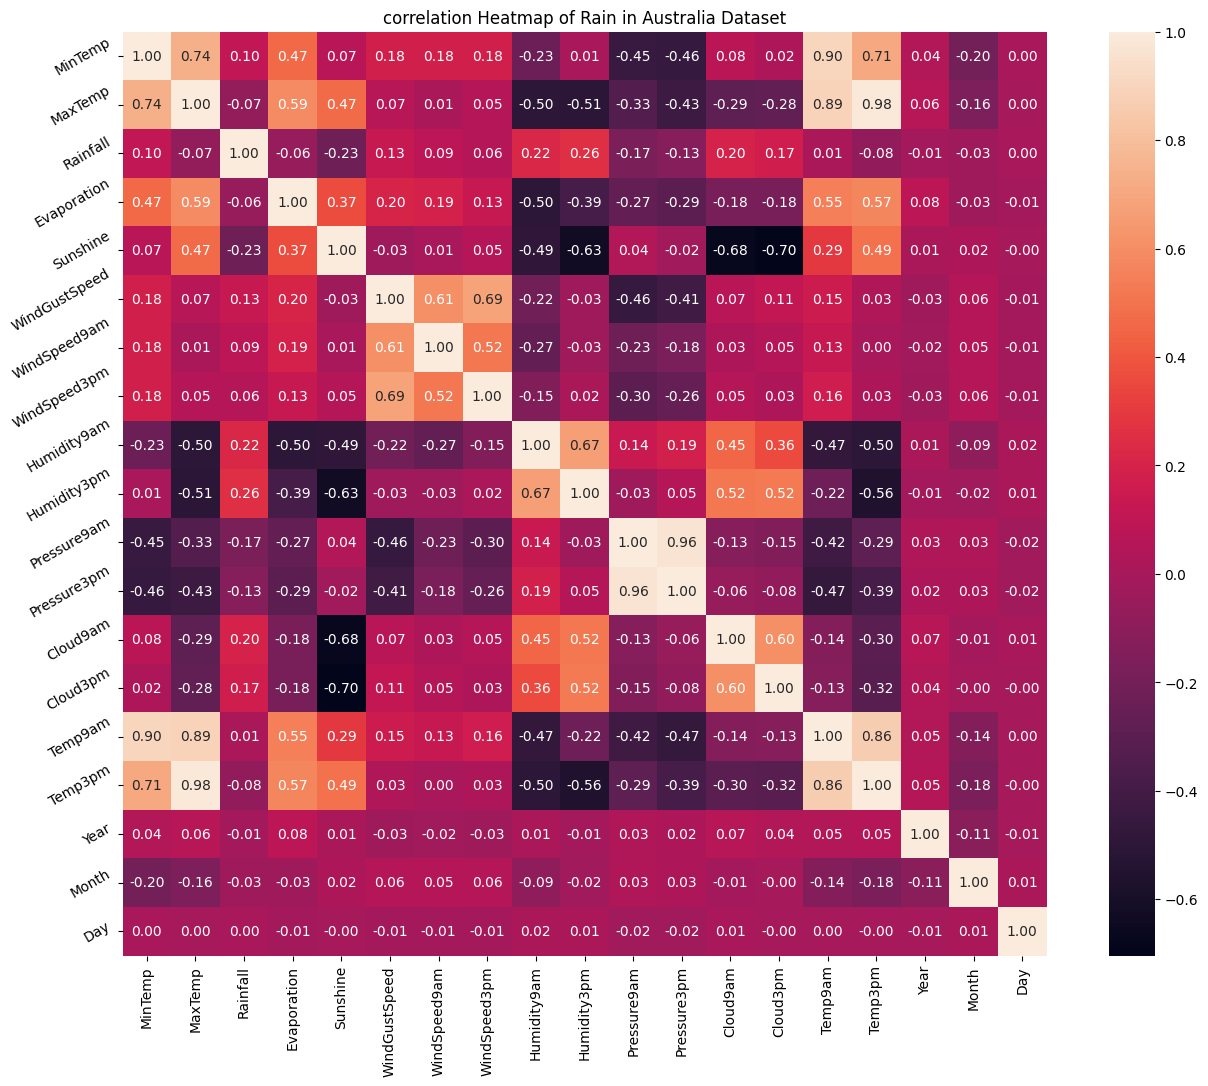

In [31]:
plt.figure(figsize=(16,12))
plt.title('correlation Heatmap of Rain in Australia Dataset')
ax=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_yticklabels(ax.get_yticklabels(),rotation=30)
plt.show()

**Interpretation**

From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

**Pairplot**

Extract the variables which are which are highly positively correlated and draw a pairplot to depict relationship between these variables.

In [32]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

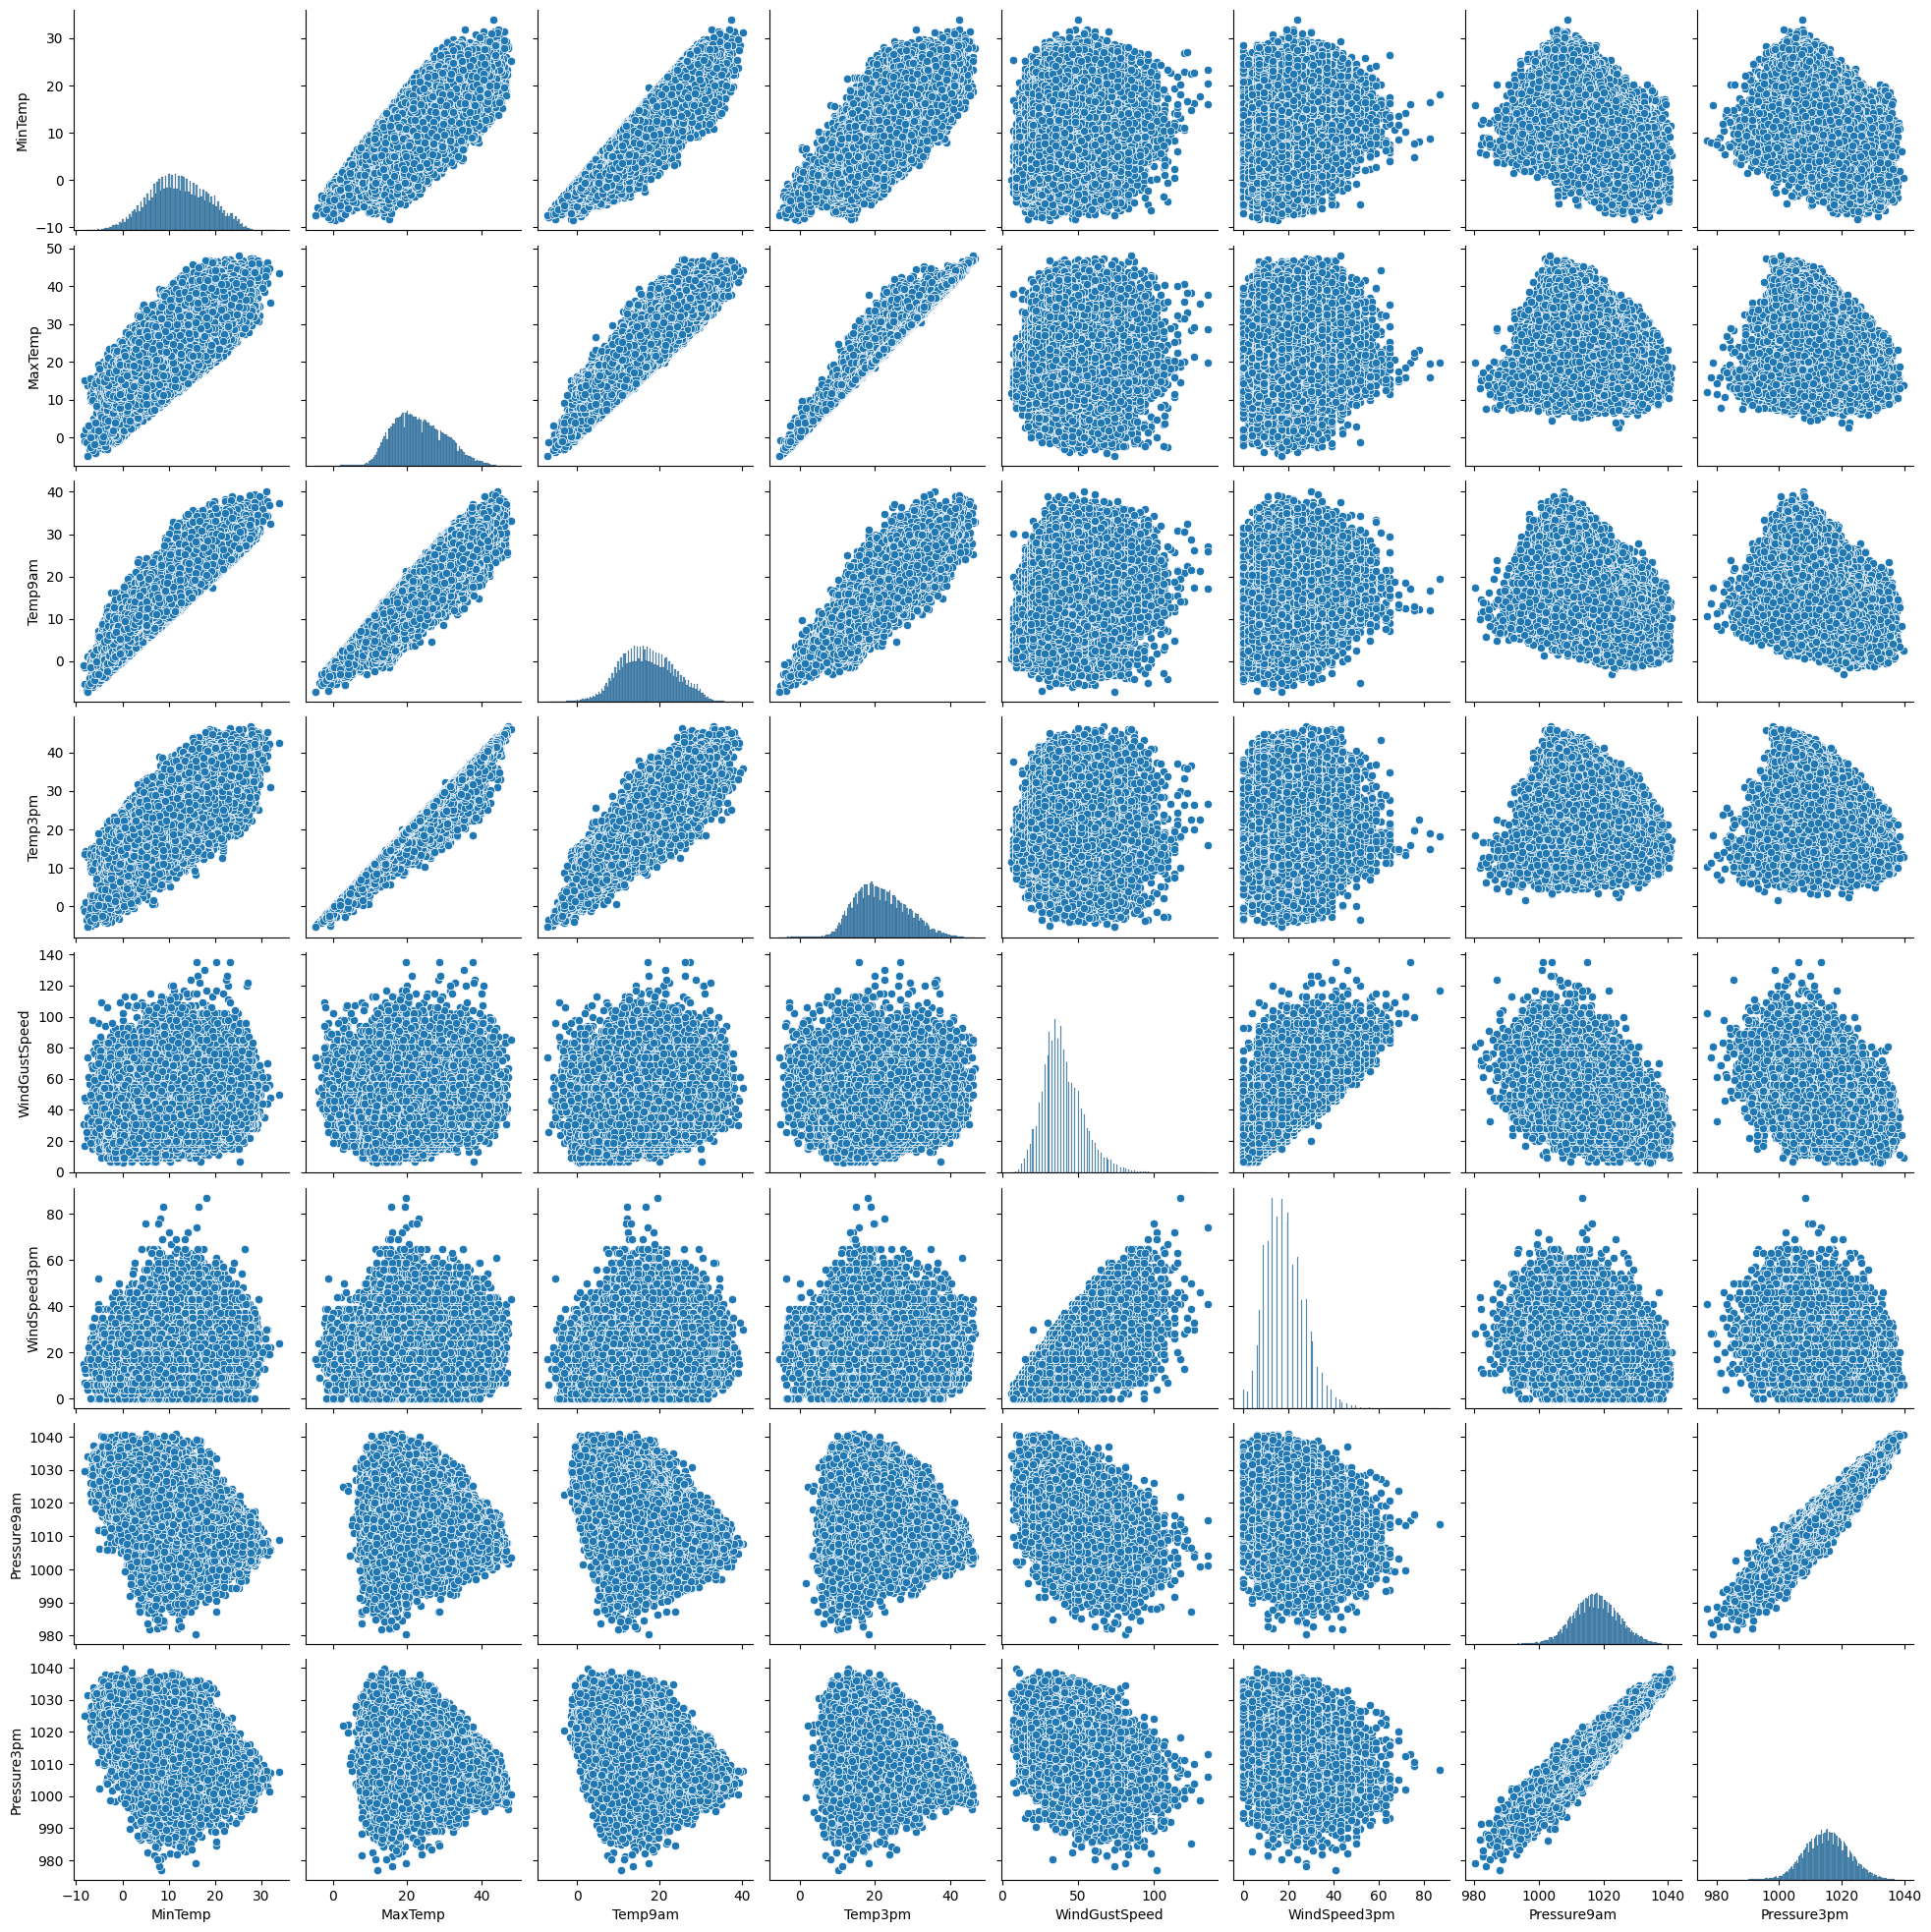

In [33]:
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist',palette='Rainbow')
plt.show()

In [34]:
#Declare feature vector and target variable
X=df.drop(['RainTomorrow'],axis=1)

Y=df['RainTomorrow']

In [35]:
Y.isnull().sum()

3267

In [36]:
#split the data into separate training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
X_train.shape,X_test.shape

((116368, 25), (29092, 25))

In [38]:
Y_train.shape,Y_test.shape

((116368,), (29092,))

**.Feature Engineering**
Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.we will carry out feature engineering on different types of variables.

Engineering missing values in numerical variables in the X_train

In [39]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [40]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [41]:
#Checking missing values in numerical variables in the X_train
X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [42]:
#Checking missing values in numerical variables in the X_test
X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

**Assummption**

I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [43]:
#Impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train,X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median,inplace=True)

In [44]:
#Lets check again for missing values
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

We have no missing values in the numerical columns of training and test set

**Engineering missing values in categorical variables**

In [45]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col,(X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [46]:
#Impute categorical variables with the most frequent variable
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [47]:
X_train[categorical].isnull().sum()

Date           0
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

No missing values

Lets on Y_train and Y_test set variable

In [48]:
#Impute the missing values in the X_test,Y_train with the most frequent variable
for col in [Y_train,Y_test]:
    col.fillna(Y_train.mode()[0],inplace=True)

In [49]:
Y_train.isnull().sum()

0

In [50]:
Y_test.isnull().sum()

0

We can see that there are no missing values in the Y_train and Y_test

**Engineering outliers in numerical variables**
We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [51]:
import numpy as np

In [52]:
def max_value(df4,variable,top):
    return np.where(df4[variable]>top,top,df4[variable])
for df4 in [X_train,X_test]:
    df4['Rainfall']=max_value(df4,'Rainfall',3.2)
    df4['Evaporation']=max_value(df4,'Evaporation',21.8)
    df4['WindSpeed9am']=max_value(df4,'WindSpeed9am',55)
    df4['WindSpeed3pm']=max_value(df4,'WindSpeed3pm',57)

In [53]:
X_train.Rainfall.max(),X_test.Rainfall.max()

(3.2, 3.2)

In [54]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns are capped.

**Encode the categorical variables**

In [55]:
X_train[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,2014-03-12,NorfolkIsland,ESE,ESE,ESE,No
80735,2016-10-06,Watsonia,NE,NNW,NNE,No
121764,2011-08-31,Perth,SW,N,SW,Yes
139821,2010-06-11,Darwin,ESE,ESE,E,No
1867,2014-04-10,Albury,E,ESE,E,Yes


In [56]:
#Encode RainToday variable
import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['RainToday'])
X_train=encoder.fit_transform(X_train)

X_test=encoder.fit_transform(X_test)


In [57]:
X_train.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,2014-03-12,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,2016-10-06,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,2011-08-31,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,2010-06-11,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,2014-04-10,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


We can see that two additional variables RainToday_0 and RainToday_1 are created from RainToday variable.

Now, I will create the X_train training set

In [58]:
X_train=pd.concat([X_train[numerical],X_train[['RainToday_0','RainToday_1']],
                  pd.get_dummies(X_train.Location),
                  pd.get_dummies(X_train.WindGustDir),
                  pd.get_dummies(X_train.WindDir9am),
                  pd.get_dummies(X_train.WindDir3pm)],axis=1)

In [59]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_test=pd.concat([X_test[numerical],X_test[['RainToday_0','RainToday_1']],
                  pd.get_dummies(X_test.Location),
                  pd.get_dummies(X_test.WindGustDir),
                  pd.get_dummies(X_test.WindDir9am),
                  pd.get_dummies(X_test.WindDir3pm)],axis=1)

In [ ]:
X_test.head()

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called **feature scaling**. I will do it as follows.

**Feature Scaling**

In [61]:
cols=X_train.columns

In [62]:
X_train=np.array(X_train,dtype='int')

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [64]:
#Dataframe the columns
X_train=pd.DataFrame(X_train,columns=[cols])

In [65]:
X_test=pd.DataFrame(X_test,columns=[cols])

**Model training**

We use logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

#Instantiate the model
LR=LogisticRegression(solver='liblinear',random_state=0)

#fit the model
LR.fit(X_train,Y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [67]:
y_pred_test=LR.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

**predict_proba method**

This method gives the probabilities for the target variable (0 and 1)in this case, in array form.

In [68]:
#probability of getting output as 0- no rain
LR.predict_proba(X_test)[:,0]

array([0.83018381, 0.7551802 , 0.79178045, ..., 0.43318412, 0.65626709,
       0.97010779])

In [69]:
#probability of getting output as 1- rain
LR.predict_proba(X_test)[:,1]

array([0.16981619, 0.2448198 , 0.20821955, ..., 0.56681588, 0.34373291,
       0.02989221])

**Checking the accuracy score**

In [70]:
from sklearn.metrics import accuracy_score

print('Model accuracy score:{0:0.04f}'.format(accuracy_score(Y_test,y_pred_test)))

Model accuracy score:0.8481


Y_test are the true class labels and y_pre_test are the predicted class labels in the test-set

Now we Compare the *train-set* and *test-set* accuracy to check for overfitting

In [71]:
y_pred_train=LR.predict(X_train)

y_pred_train


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [72]:
print('Training-set accuracy score:{0:0.04f}'.format(accuracy_score(Y_train,y_pred_train)))

Training-set accuracy score:0.8485


The training-set accuracy score(0.8485) and the test-set accuracy score(0.8481) are quite comparable.so there's no question of overfitting.

**Confusion matrix**

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred_test)

print('Confusion Matrix\n\n',cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[21565  1161]
 [ 3257  3109]]

True Positives(TP) =  21565

True Negatives(TN) =  3109

False Positives(FP) =  1161

False Negatives(FN) =  3257


The confusion matrix shows 20892+3285=24177 correct predictions and 3087+1175=4262 incorrect predictions

<AxesSubplot: >

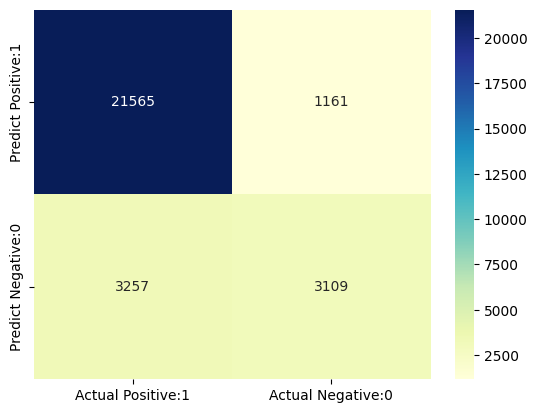

In [77]:
#Visualize confusion matrix with seaborn heatmap
cm_matrix=pd.DataFrame(data=cm,columns=['Actual Positive:1','Actual Negative:0'], 
                       index=['Predict Positive:1','Predict Negative:0'])

sns.heatmap(cm_matrix,annot=True,fmt='d',cmap='YlGnBu')

**Classification Report**

Classification Report 

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [78]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.73      0.49      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092

